In [1]:
#IMPORT NECESSARY PACKAGES
import pandas as pd
from datetime import datetime
import CO2_functions
from CO2_functions import *

In [63]:
import importlib
importlib.reload(CO2_functions)
from CO2_functions import *

In [100]:
import pickle

# with open('data.pickle', 'wb') as handle:
#     pickle.dump(data2, handle, protocol=pickle.HIGHEST_PROTOCOL)
    
with open('data.pickle', 'rb') as handle:
    b = pickle.load(handle)

In [4]:
date1,date2 = get_date_range()
data = get_sql_data("Aug2019_LI_8100_Vent",\
              "Aug2019_Multiplexer","Aug2019_Vent_Anem_Temp",\
              "Aug2019_Picarro",date1,date2,'all','split')

Enter Start Date YYYY-mm-DD:  2019-08-29
Enter End Date YYYY-mm-DD:  2019-09-10


Retrieving LI_vent data
Retrieving Multiplexer data
Retrieving Vent_Anem_Temp data
Retrieving Picarro data


In [53]:
data1 = drift_correct(data)

Initializing Drift Correct
Correcting data for LI_Vent
Correcting data for Multiplexer_CO2_1
Correcting data for Multiplexer_CO2_2
Correcting data for Multiplexer_CO2_3
Correcting data for Multiplexer_Weather
Correcting data for Vent_Anem_Temp
Correcting data for Picarro_CO2
Correcting data for Picarro_ANEM


In [64]:
data2 = remove_spikes(pd.read_pickle('Spike_ETs.pkl'),data1)

In [ ]:
wind_add(data2['Picarro_ANEM'],1)

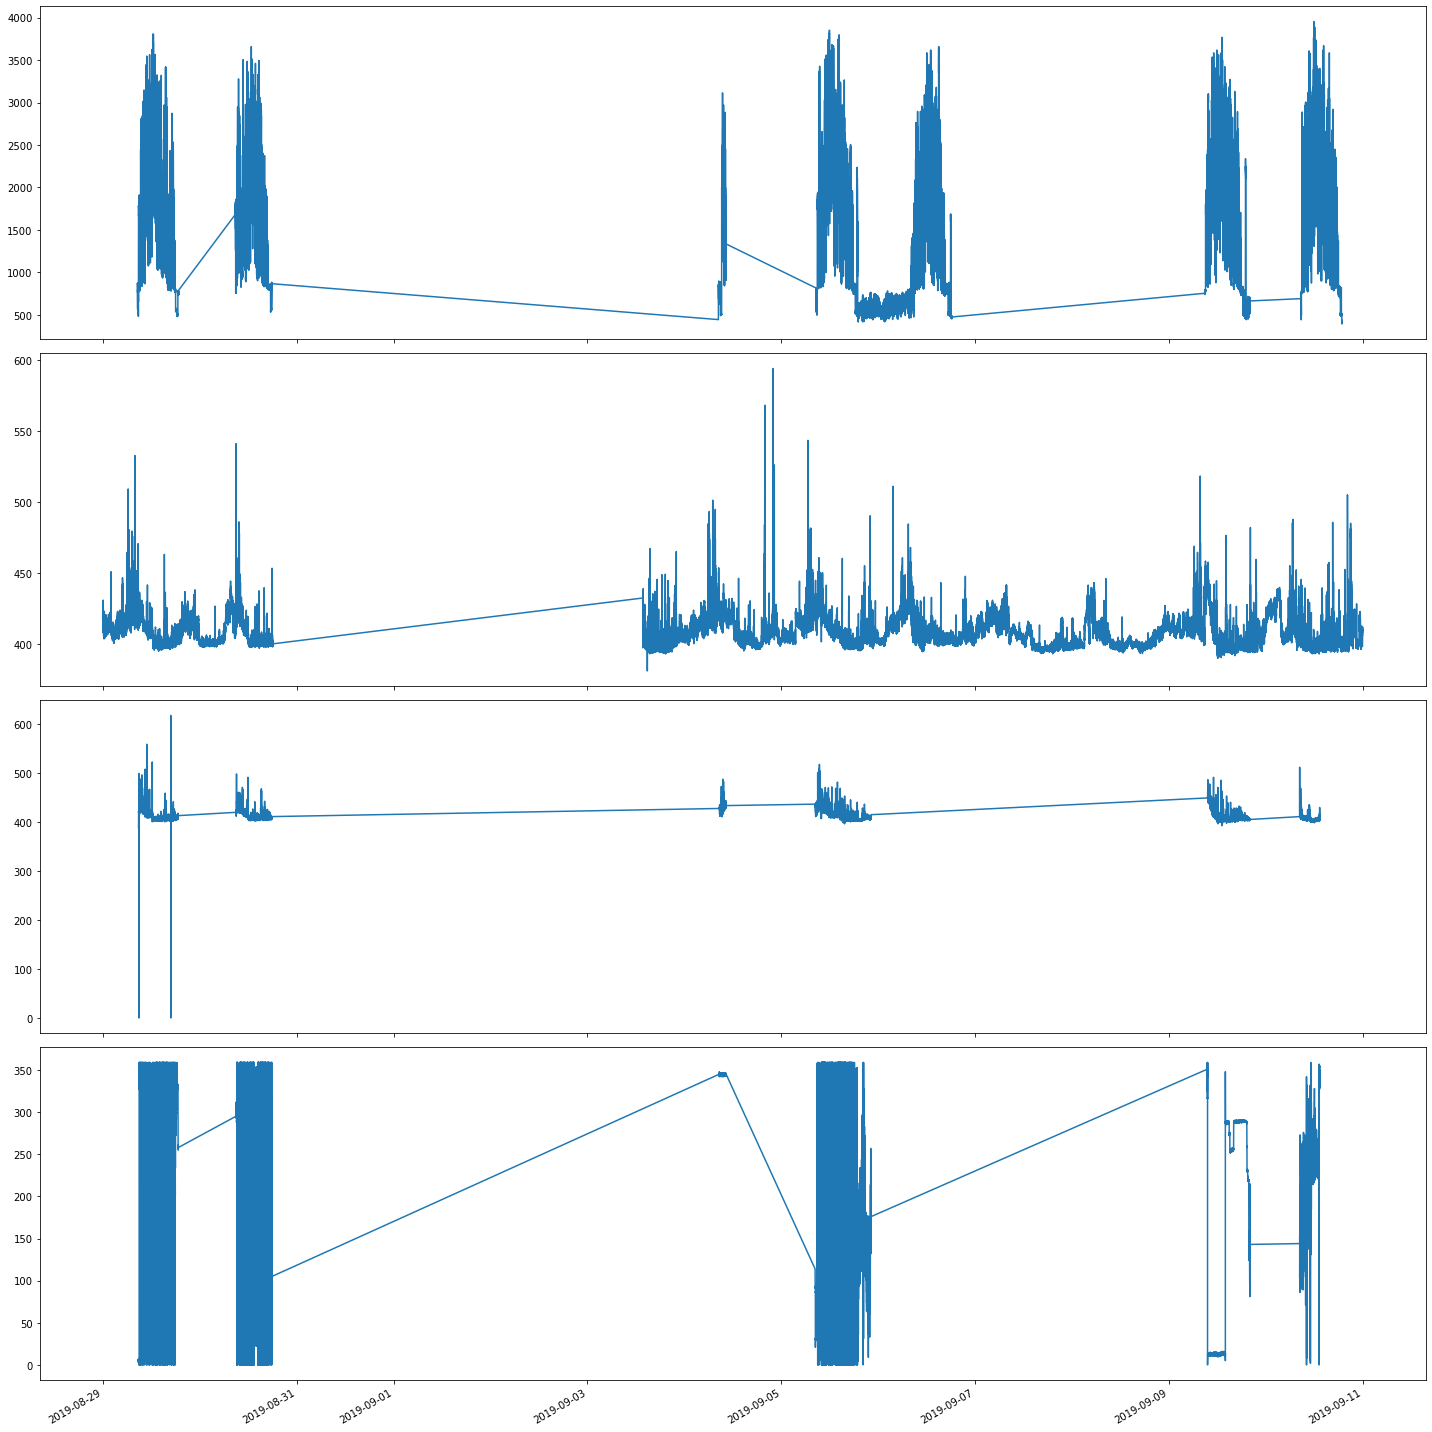

Is this an acceptable range?  n
Input Start DateTime as YYYY-mm-DD HH:MM:SS -  2019-08-29 08:00:00
Input End DateTime as YYYY-mm-DD HH:MM:SS -  2019-08-29 20:00:00


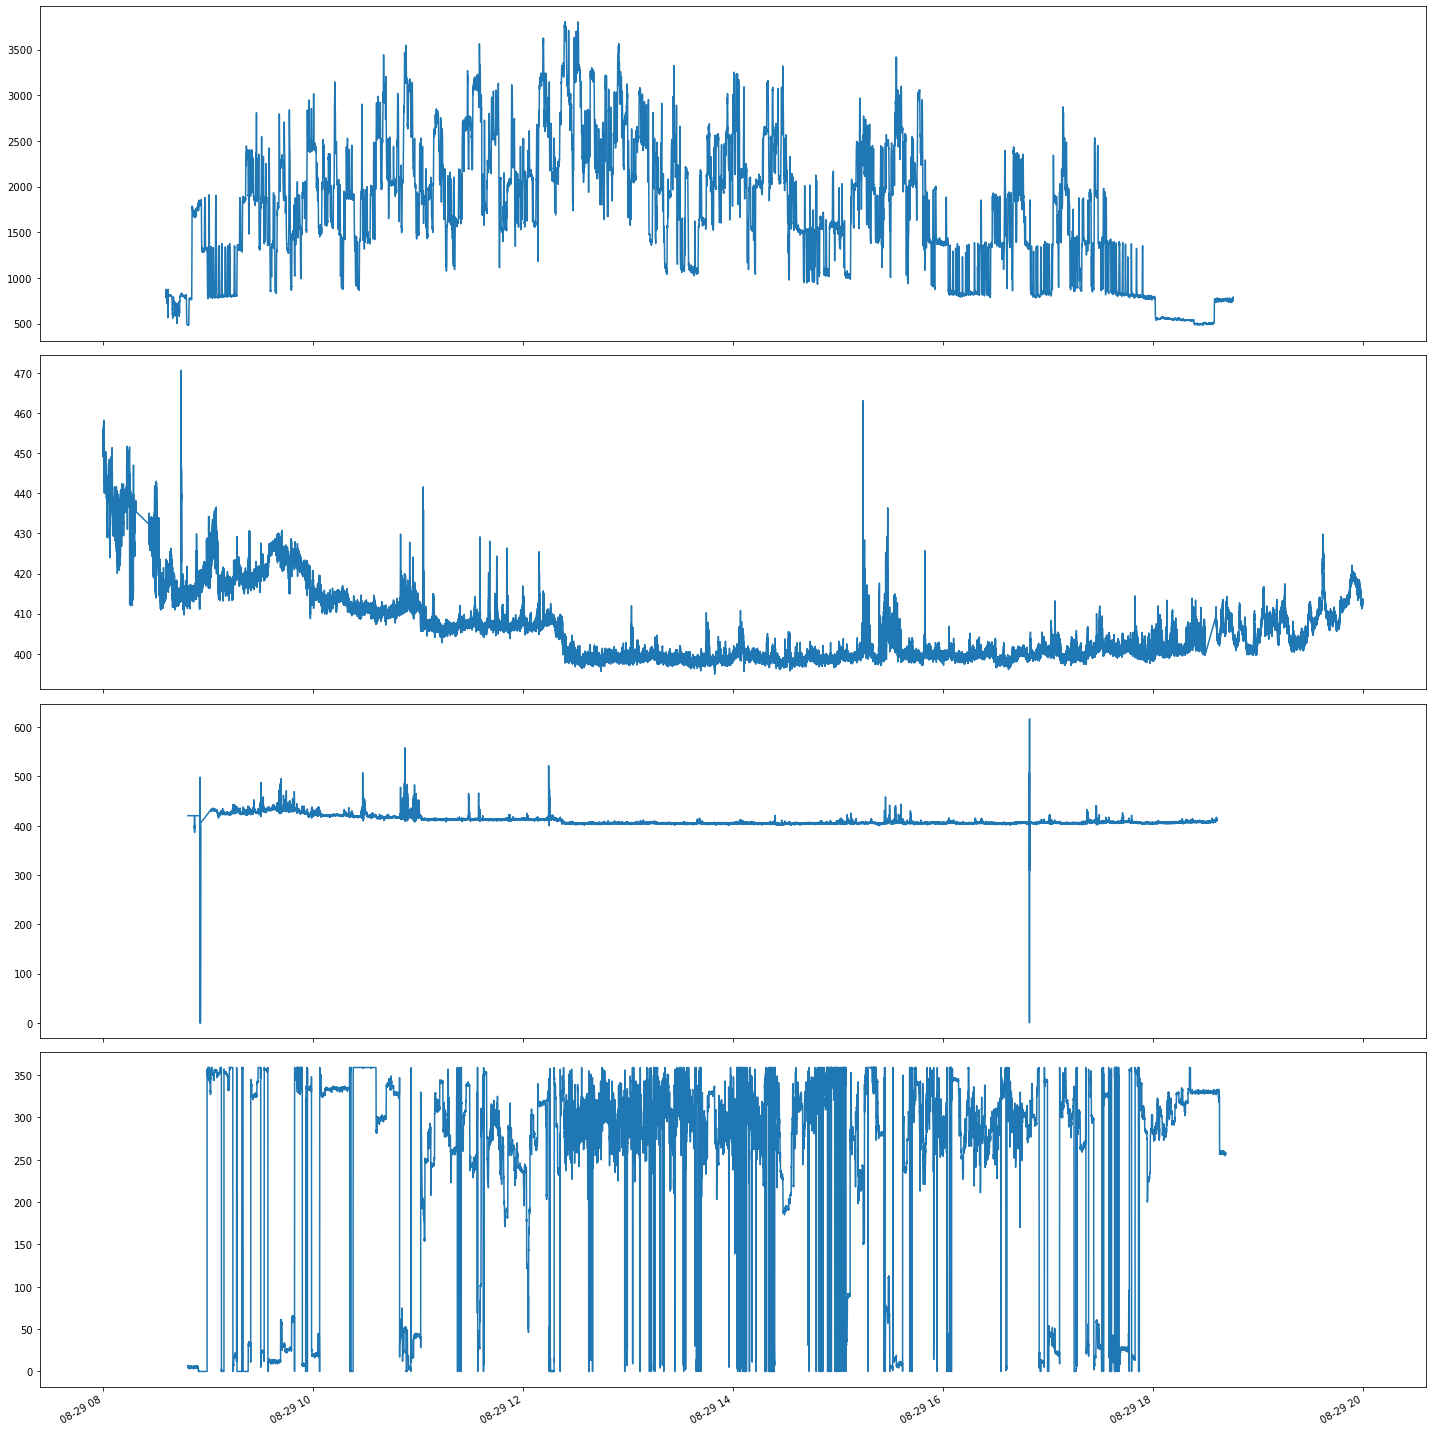

Is this an acceptable range?  n
Input Start DateTime as YYYY-mm-DD HH:MM:SS -  2019-08-29 15:00:00
Input End DateTime as YYYY-mm-DD HH:MM:SS -  2019-08-29 16:00:00


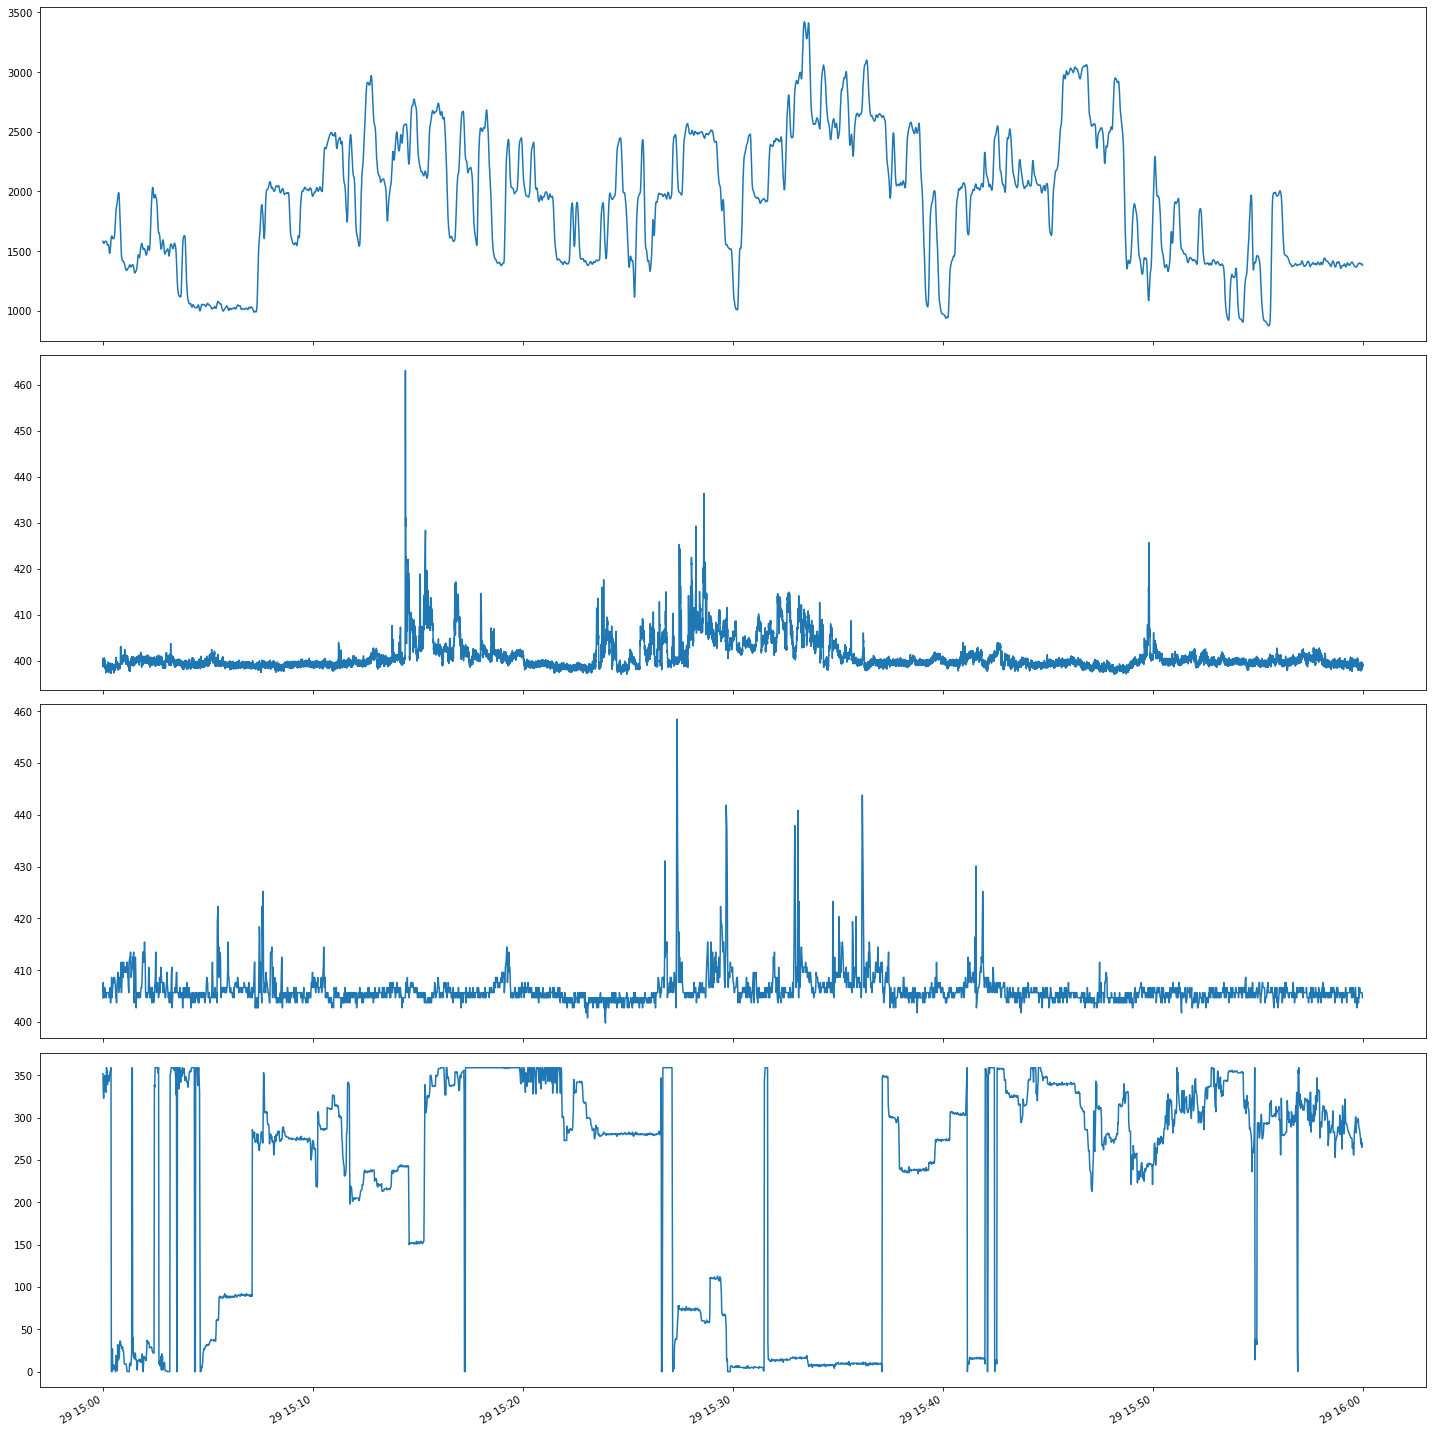

Is this an acceptable range?  n
Input Start DateTime as YYYY-mm-DD HH:MM:SS -  2019-08-30 08:00:00
Input End DateTime as YYYY-mm-DD HH:MM:SS -  2019-08-30 20:00:00


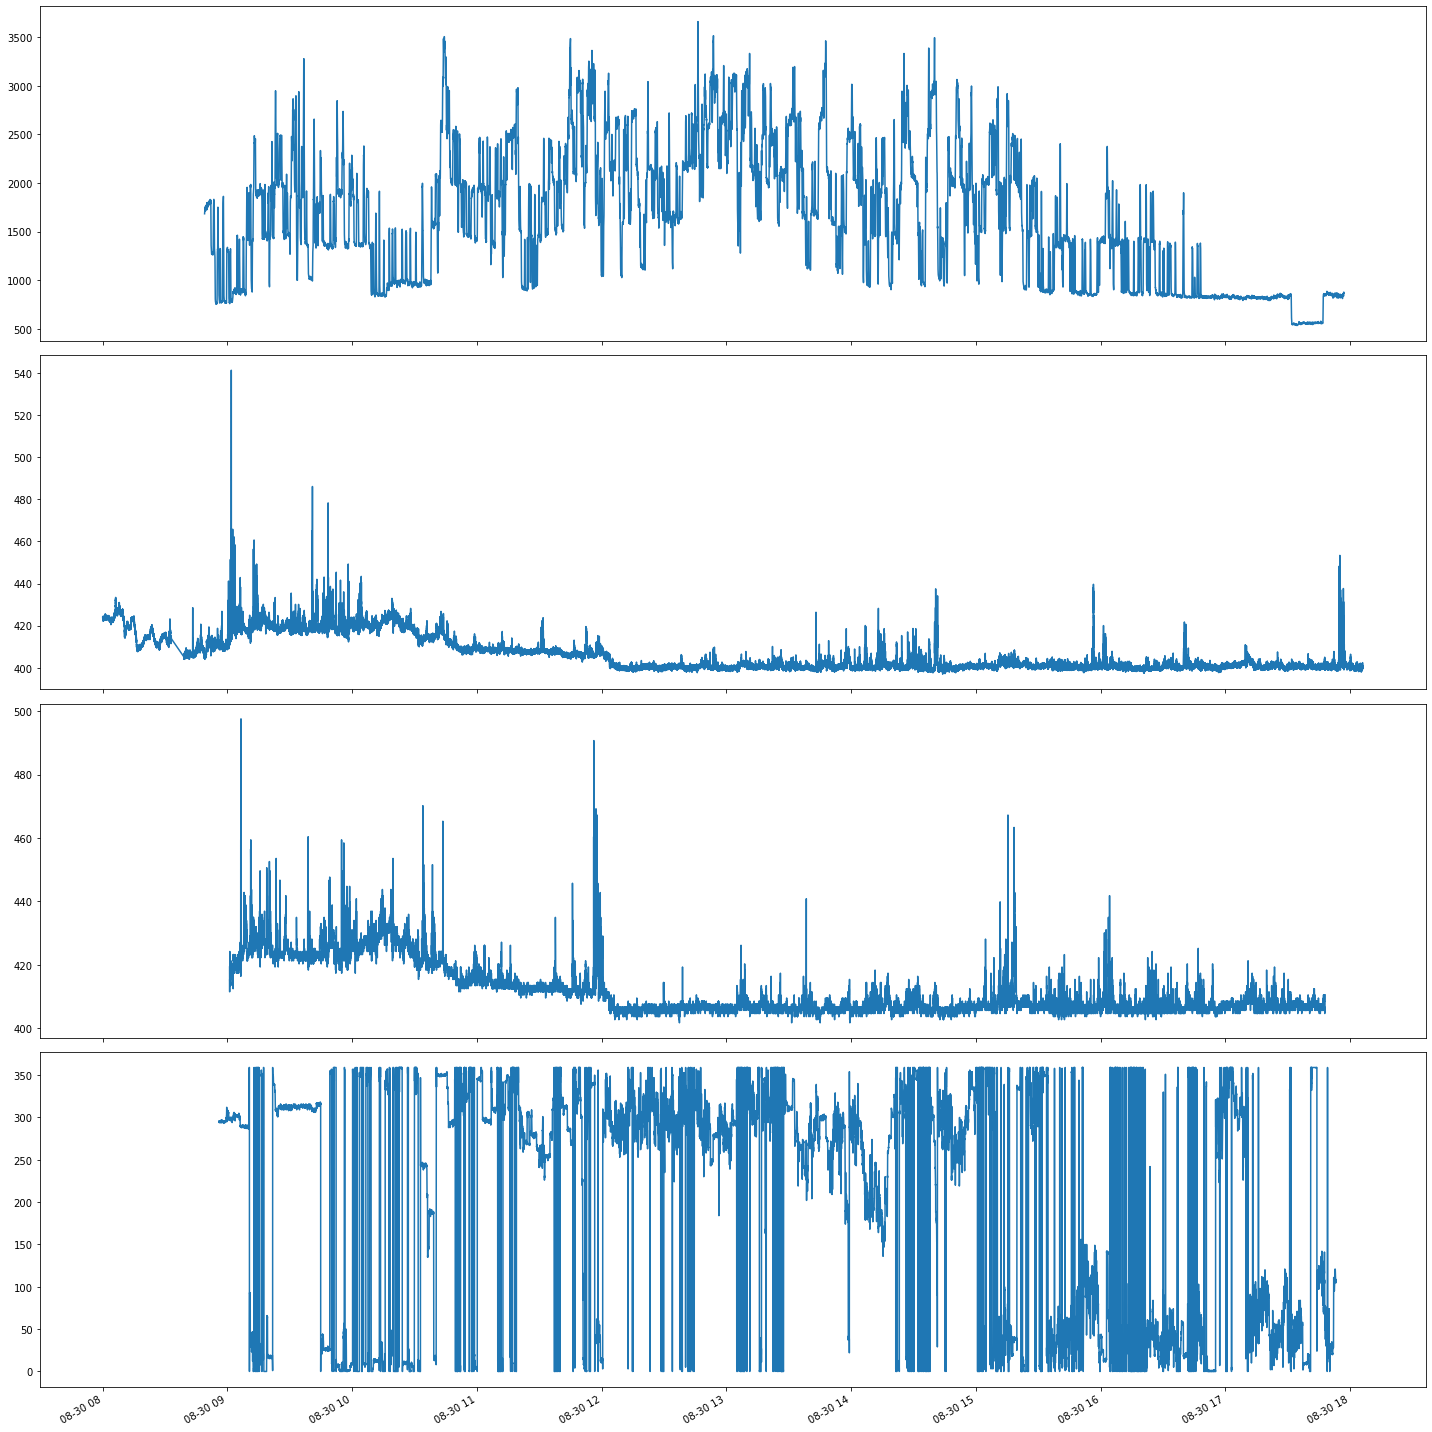

Is this an acceptable range?  n
Input Start DateTime as YYYY-mm-DD HH:MM:SS -  2019-08-30 15:50:00
Input End DateTime as YYYY-mm-DD HH:MM:SS -  2019-08-30 16:10:00


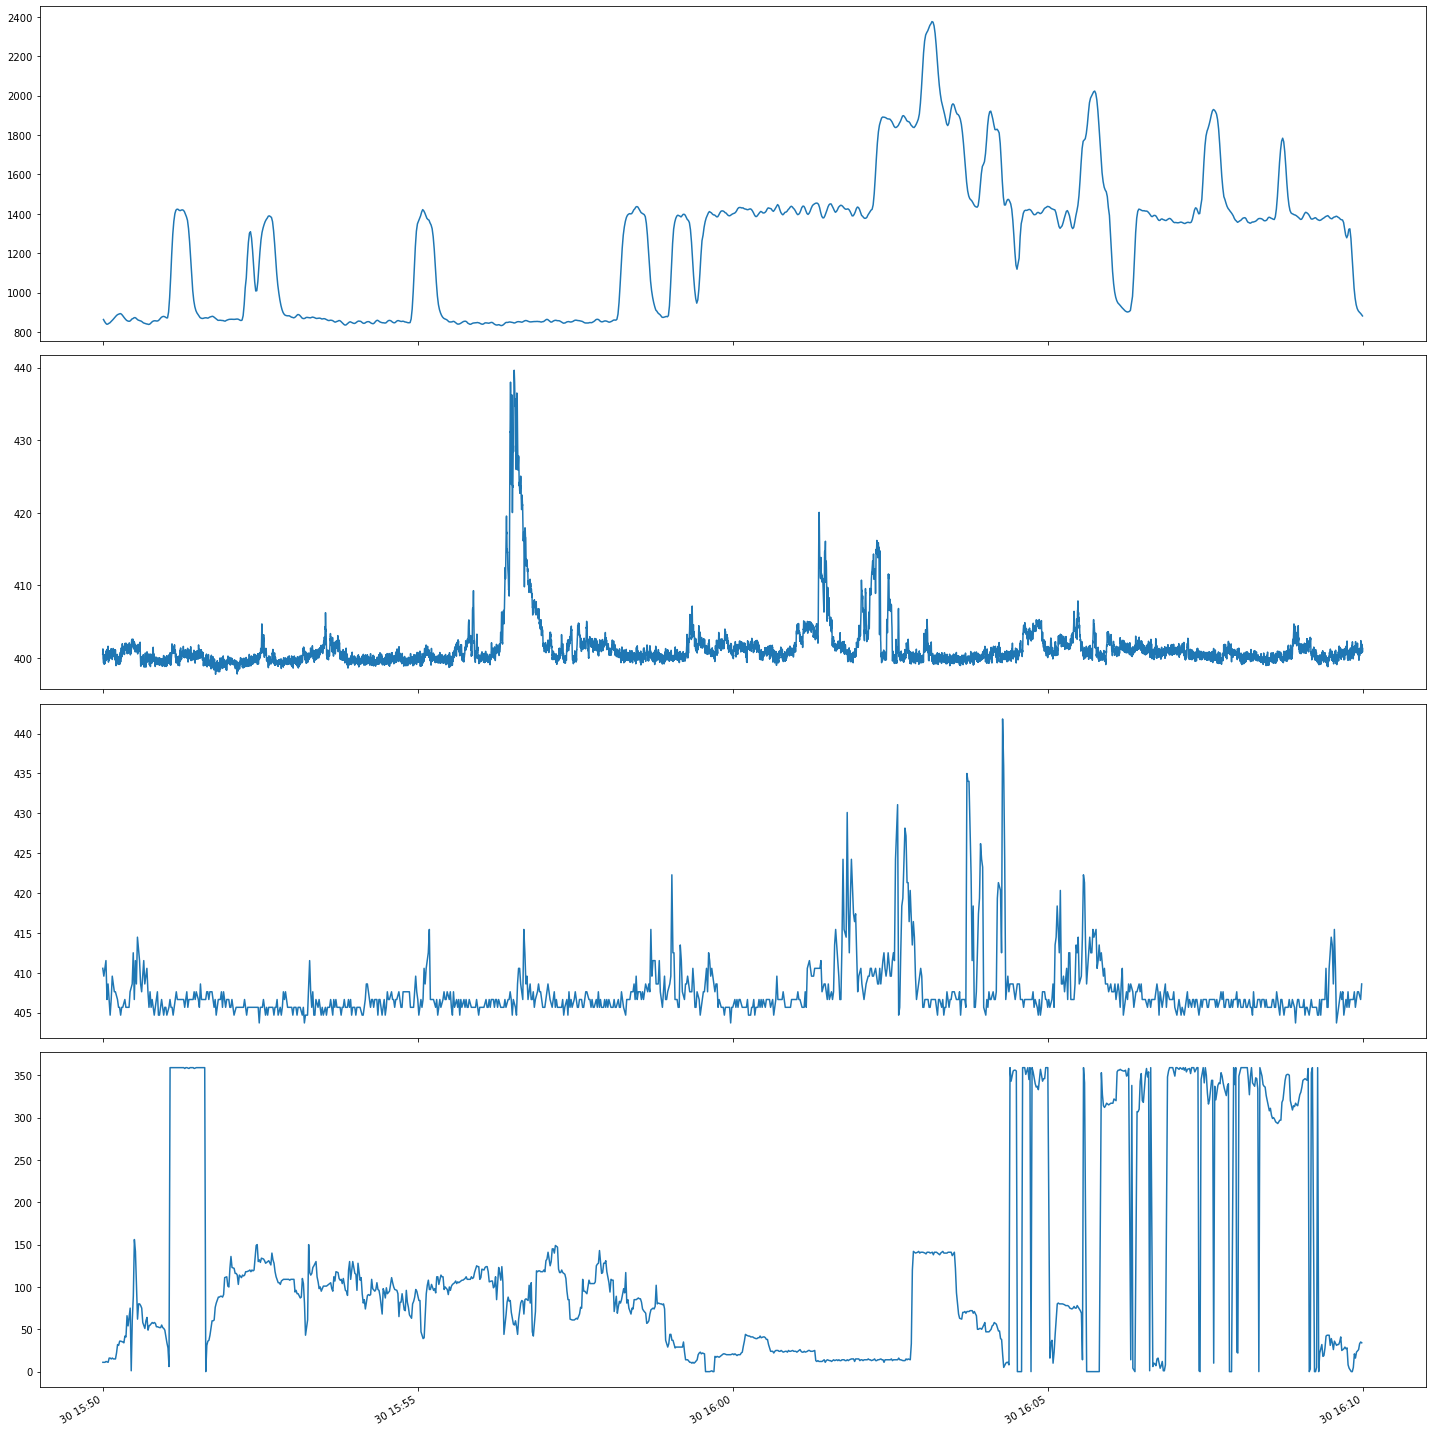

Is this an acceptable range?  y


[                             Local_DT    EPOCH_TIME     CO2  Corrected_ET  \
 12 12 12 12 62714 2019-08-30 15:56:42  1.567202e+09  863.07  1.567202e+09   
             62715 2019-08-30 15:56:43  1.567202e+09  853.07  1.567202e+09   
             62716 2019-08-30 15:56:44  1.567202e+09  845.13  1.567202e+09   
             62717 2019-08-30 15:56:45  1.567202e+09  839.38  1.567202e+09   
             62718 2019-08-30 15:56:46  1.567202e+09  839.37  1.567202e+09   
 ...                               ...           ...     ...           ...   
             63909 2019-08-30 16:16:37  1.567203e+09  907.35  1.567203e+09   
             63910 2019-08-30 16:16:38  1.567203e+09  900.68  1.567203e+09   
             63911 2019-08-30 16:16:39  1.567203e+09  895.23  1.567203e+09   
             63912 2019-08-30 16:16:40  1.567203e+09  888.77  1.567203e+09   
             63913 2019-08-30 16:16:41  1.567203e+09  881.22  1.567203e+09   
 
                                 Corrected_DT  
 12 12 12 12 6

In [102]:
plot_refinement_all([[data2['LI_Vent'],'Corrected_DT','CO2'],[data2['Picarro_CO2'],'Corrected_DT','CO2'],[data2['Multiplexer_CO2_3'],'Corrected_DT','CO2_3'],[data2['Multiplexer_Weather'],'Corrected_DT','Wind_Direction']])